In [24]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

%matplotlib inline

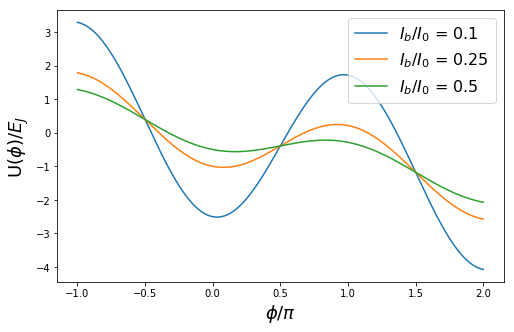

In [25]:
a = 0.002
phi = 2 * a * np.linspace(-250, 500, 751)
ri = .25
uj = 1
u = uj * ( - ri * phi * np.pi- np.cos(phi* np.pi))
ri = .1
uj = 2.5
u2 = uj * ( - ri * phi * np.pi- np.cos(phi* np.pi))
ri = .5
uj = .5
u3 = uj * ( - ri * phi * np.pi- np.cos(phi* np.pi))


fig = plt.figure(figsize=(8,5))
plt.plot(phi, u2, label='$I_b/I_0$ = 0.1')
plt.plot(phi, u, label='$I_b/I_0$ = 0.25')
plt.plot(phi, u3, label='$I_b/I_0$ = 0.5')
plt.xlabel('$\phi/\pi$', fontsize=18)
plt.ylabel('U($\phi$)/$E_J$', fontsize=18)
plt.legend(loc='best', fontsize=16)
plt.savefig('washboard_potential.png', bbox_inches='tight', pad_inches=0.1, transparent=True)

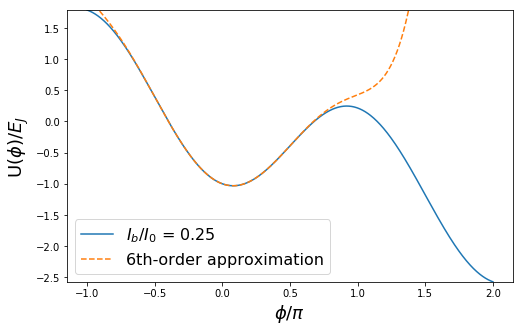

In [51]:

def sextic_cos(x):
    return 1 - np.power(x,2)/2 +  np.power(x,4)/24 -  np.power(x,6)/720
a = 0.002
phi = 2 * a * np.linspace(-250, 500, 751)
ri = .25
uj = 1
u = uj * ( - ri * phi * np.pi- np.cos(phi* np.pi))
approx_u = uj * ( - ri * phi * np.pi- sextic_cos(phi* np.pi))


fig = plt.figure(figsize=(8,5))
plt.plot(phi, u, label='$I_b/I_0$ = 0.25')
plt.plot(phi, approx_u, '--', label='6th-order approximation')
plt.ylim([np.min(u), np.max(u)])
plt.xlabel('$\phi/\pi$', fontsize=18)
plt.ylabel('U($\phi$)/$E_J$', fontsize=18)
plt.legend(loc='best', fontsize=16)
plt.savefig('washboard_potential.png', bbox_inches='tight', pad_inches=0.1, transparent=True)


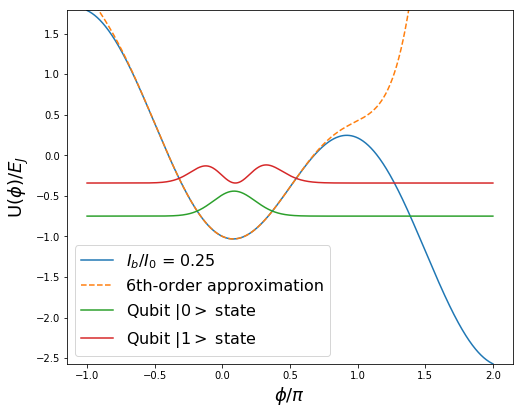

In [61]:
T0 = 50000
T = T0 * 2 * np.pi * a * (-2 * np.diag( np.ones(len(phi))) + np.diag( np.ones(len(phi)-1), 1) + np.diag( np.ones(len(phi)-1), -1))
pot = np.diag(approx_u)
eig_val, eig_vec = la.eigh(T + pot)
# plt.figure(figsize=(10, 7))
# plt.plot(phi, approx_u,)
# plt.plot(phi, 20 * np.square(eig_vec[:, :2]))
# plt.ylim([np.min(approx_u), np.max(u)])



fig = plt.figure(figsize=(8,6.5))
plt.plot(phi, u, label='$I_b/I_0$ = 0.25')
plt.plot(phi, approx_u, '--', label='6th-order approximation')
plt.plot(phi, 30 * np.square(eig_vec[:, 0]) - .75, label='Qubit $| 0 >$ state')
plt.plot(phi, 30 * np.square(eig_vec[:, 1]) + (eig_val[1] - eig_val[0])-.75, label='Qubit $| 1 >$ state')
plt.ylim([np.min(u), np.max(u)])
plt.xlabel('$\phi/\pi$', fontsize=18)
plt.ylabel('U($\phi$)/$E_J$', fontsize=18)
plt.legend(loc='best', fontsize=16)
plt.savefig('eigenstates_sixth_order.png', bbox_inches='tight', pad_inches=0.1, transparent=True)